In [2]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

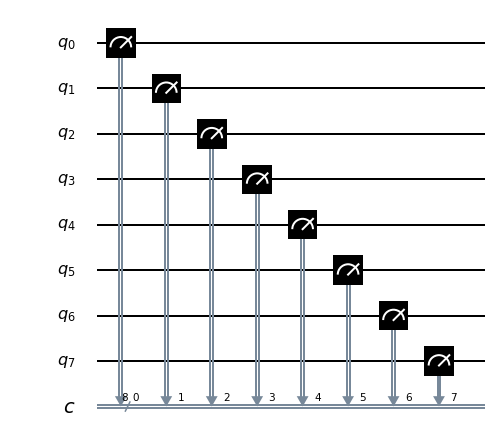

In [3]:
#WRITE A BINARY STRING USING QISKIT
#Qubits are always initialized to give the output 0.
n = 8
qc_output = QuantumCircuit(n,n) #create a quantum circuit with 8 qbits and 8 classical bits to map qbits to
for j in range(n):
    qc_output.measure(j,j) #measure the jth qbit and map measurement to the jth classical bit

qc_output.draw(output='mpl') #draw the circuit

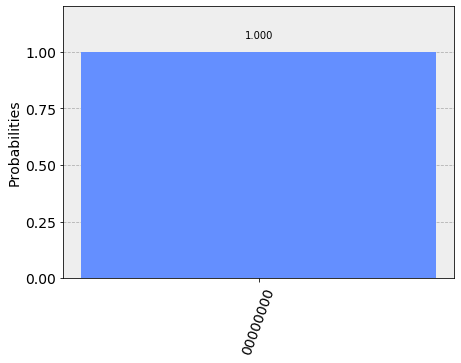

In [4]:
#get the Aer simulator backend and simulate the quantum circuit above. store the results in counts
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

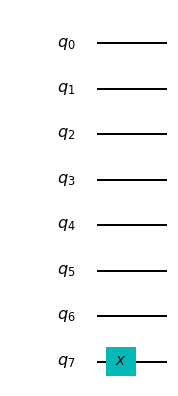

In [5]:
qc_encode = QuantumCircuit(n) #create a quantum circuit with 8 qbits
qc_encode.x(7) #on the 7th qbit (starting at 0) add a not gate

qc_encode.draw(output='mpl') #draw the circuit

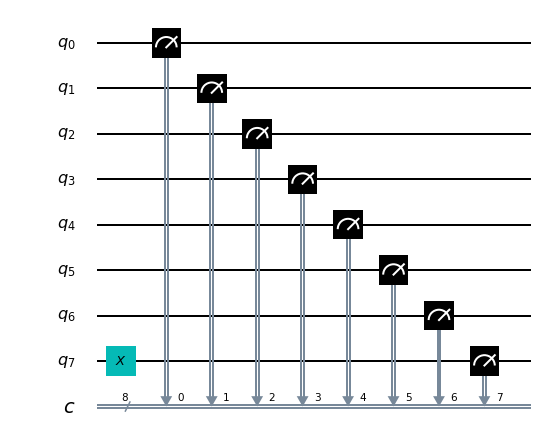

In [8]:
qc = qc_encode + qc_output #add the qc output circuit to the one above, this way its mapped to the classical bits
qc.draw(output='mpl',justify='none')

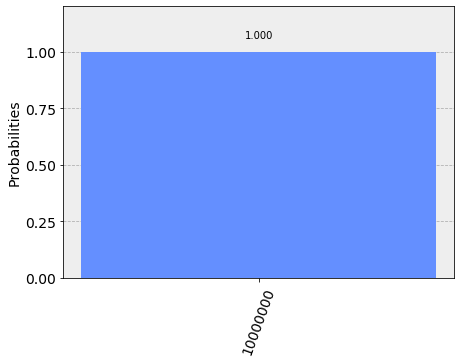

In [10]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts() #run the simulation and store results in counts
plot_histogram(counts)

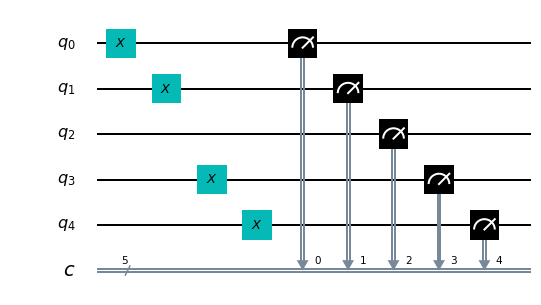

In [14]:
#my age = 27 = 1*(2^4) + 1*(2^3) + 0*(2^2) + 1*(2^1) + 1*(2^0)
qc_encode = QuantumCircuit(5)
qc_encode.x(0)
qc_encode.x(1)
qc_encode.x(3)
qc_encode.x(4)


qc_output = QuantumCircuit(5,5) #create a quantum circuit with 8 qbits and 8 classical bits to map qbits to
for j in range(5):
    qc_output.measure(j,j) #measure the jth qbit and map measurement to the jth classical bit

qc_encode.draw(output='mpl')
qc = qc_encode + qc_output #add the qc output circuit to the one above, this way its mapped to the classical bits
qc.draw(output='mpl',justify='none')

In [15]:
#MAKE A HALF ADDER USING QISKIT
# 0 + 0 -> 00
# 0 + 1 -> 01
# 1 + 0 -> 01
# 1 + 1 -> 10

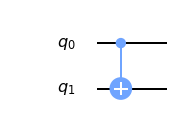

In [17]:
qc_cnot = QuantumCircuit(2) #demonstrate the controlled not or cnot gate or cx gate this is an XOR
qc_cnot.cx(0,1) #control qbit is 0th qbit and the target qbit is the 1st qbit
qc_cnot.draw(output='mpl')

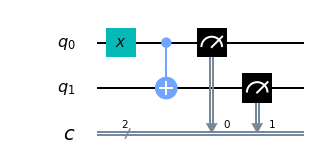

In [18]:
qc = QuantumCircuit(2,2) #QC with 2 qbits mapped to 2 classical bit
qc.x(0) #add not gate to 0th qbit making the |0> bit a |1> bit
qc.cx(0,1) #add CNOT gate with 0th qbit as the control and 1st qbit as the target
qc.measure(0,0) #map the 0th qbit measurement to 0th classical bit
qc.measure(1,1)  #map the 1st qbit measurement to 1st classical bit
qc.draw(output='mpl')


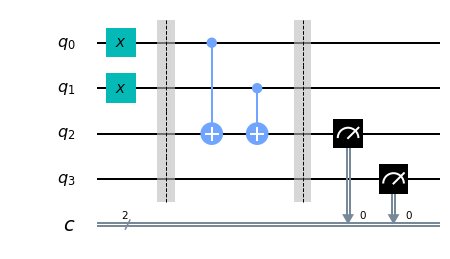

In [19]:
qc_ha = QuantumCircuit(4,2) #new quantum circuit with 4 qbits that maps to 2 classical bits
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,0)

qc_ha.draw(output='mpl')

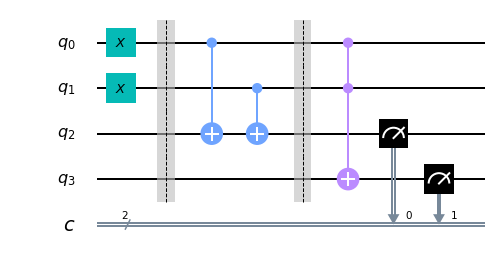

In [21]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3) #control qbits are 0 and 1 target qbit is 3
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')

In [22]:
#Calculate 1 + 1 = 10 and plot the results

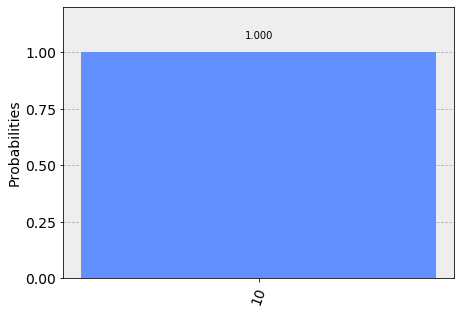

In [23]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

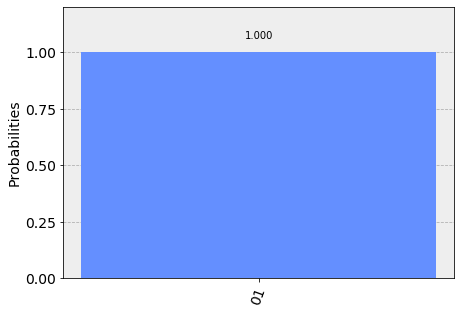

In [24]:
#Calculate 0 + 1 =01 and plot the results
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
#qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3) #control qbits are 0 and 1 target qbit is 3
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

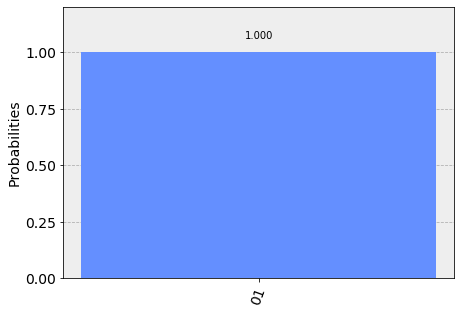

In [25]:
#Calculate 1 + 0 =01 and plot the results
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
#qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3) #control qbits are 0 and 1 target qbit is 3
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

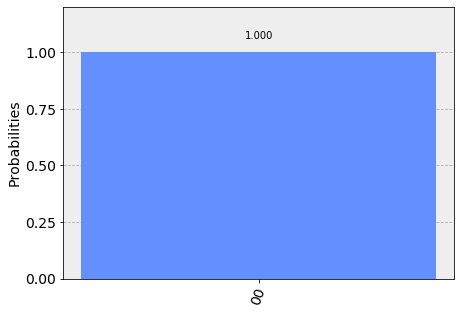

In [27]:
#Calculate 0 + 0 =00 and plot the results
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
#qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
#qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3) #control qbits are 0 and 1 target qbit is 3
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

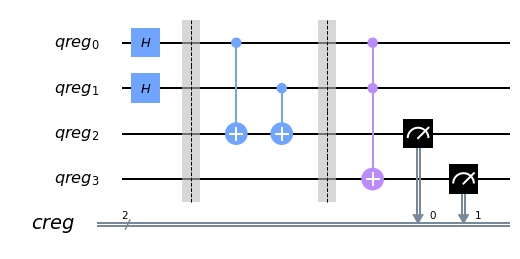

In [5]:
#FIRST NAIVE ATTEMPT AT A QUANTUM HALF ADDER USING HADAMARD GATES ON THE INPUT BITS
#Calculate 0 + 0 =00 and plot the results
qc_ha = QuantumCircuit()
# encode inputs in qubits 0 and 1
qr = QuantumRegister(4,'qreg') #Define a two bit quantum register with name qreg
cr = ClassicalRegister(2,'creg') #You DO NOT get state vectors from quantum measurements you get probability distributions!!
# so map QBITS to classical bits or map quantumr registers to classical registers

qc_ha.add_register( qr ) #Add the quantum register to the quantum circuit
qc_ha.add_register( cr ) #Add the classical register to the quantum circuit


# encode inputs in qubits 0 and 1
qc_ha.h( qr[0] ) #Add an H (Hadamard) gate to the circuit and tell it to ACT on the 0th QBIT in the register
qc_ha.h( qr[1] ) #Add an H (Hadamard) gate to the circuit and tell it to ACT on the 1st QBIT in the register
qc_ha.barrier()


# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3) #control qbits are 0 and 1 target qbit is 3

#qc_ha.h( qr[2] ) #Add an H (Hadamard) gate to the circuit and tell it to ACT on the 2nd QBIT in the register
#qc_ha.h( qr[3] ) #Add an H (Hadamard) gate to the circuit and tell it to ACT on the 3rd QBIT in the register


# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value


qc_ha.draw(output='mpl')





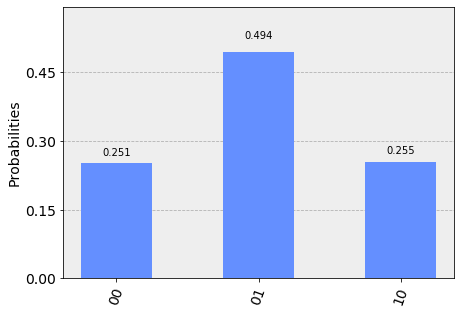

In [6]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)